# Project 1: Golf - Euler Method

## William Willmon

### Exercise 1 -  Projectile Motion of Ping Pong Ball

$\frac{dv_x}{dt} = - \frac{F_{drag,x}}{m} - \frac{S_0\omega v_y}{m}$

$\frac{dv_y}{dt} = - \frac{F_{drag,y}}{m} + \frac{S_0\omega v_x}{m} - g$

$F_{drag} = -C\rho A v^2$


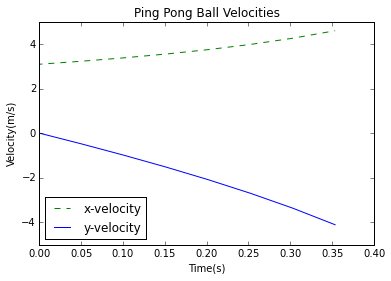

In [294]:
import math
import numpy as np
from matplotlib.pylab import plt
% matplotlib inline

# Declare variables to calculate behavior of ping pong ball
C = 0.5 
S0_m = 0.040
M = 2.7/1000
w = 1
theta = math.pi/20
a = 0.0
b = 5
N = 100
h = (b-a)/N
density = 1.225
v0 = 3
r = 0.02
A = math.pi*r**2


def f_drag(c,p,a,vel):
    '''Returns the drag force based on values input.
    
    c = coefficient of drag
    p = density of air
    a = cross sectional area of object
    vel = velocity'''
    return -c*p*a*(vel**2)

def acc_x(drag,m,s0_m,vel,omega):
    '''Returns the horizontal acceleration based on values input.
    
    drag = drag force in the x direction
    m = mass of object
    s0_m = 
    vel = velocity in m/s
    omega = the rotaional velocity of the ball in rad/s'''
    
    return -drag/m -s0_m*vel*omega

def acc_y(drag,m,s0_m,vel,omega):
    '''Returns the vertical acceleration based on values input.
    
    drag = drag force in the y direction
    m = mass of object
    s0_m = 
    vel = velocity in m/s
    omega = the rotaional velocity of the ball in rad/s'''
    
    g = 9.81
    return -drag/m +s0_m*omega*vel - g

# Use the initial velocity and the departure angle to calculate the initial velocity in the x and y direction
vx = v0*math.cos(theta)
vy = v0*math.sin(theta)

# Create arrays for the x and y velocities and put the initial velocities in them
vxpoints = [vx]
vypoints = [vy]

tpoints = np.linspace(a,b,N)
t = [0]

# (1) Calculate the drag for at the particular velocity for the x and y direction
# (2) 
for i in tpoints:
    if i > 0.4:
        break
    t.append(i)
    v_tot = np.sqrt(vx**2+vy**2)
    theta_new = np.arcsin(vy/v_tot)
    
    
    f_temp = f_drag(C,density,A,v_tot)

    fx = f_temp*math.cos(theta_new)
    fy = f_temp*math.sin(theta_new)
    
    vx += h*acc_x(fx,M,S0_m,vy,w)
    vy += h*acc_y(fy,M,S0_m,vx,w)
    
    vxpoints.append(vx)
    vypoints.append(vy)
    
plt.plot(t,vxpoints,"g--",label = "x-velocity")
plt.plot(t,vypoints,label = "y-velocity")
plt.legend(loc = 'best')
plt.xlabel("Time(s)")
plt.ylabel("Velocity(m/s)")
plt.title("Ping Pong Ball Velocities")

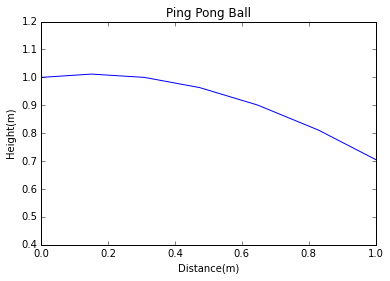

In [355]:
# Declare variables and lists
Dx = [0]
Dy = [0]
N0 = len(vxpoints)-1

# Calculate the initial value of 
sx = 0
sy = 1

Dx.append(sx)
Dy.append(sy)

for k in range(N0-1):
    sx += (vxpoints[k] + vxpoints[k+1])*h/2
    sy += (vypoints[k] + vypoints[k+1])*h/2
    Dx.append(sx)
    Dy.append(sy)
    
plt.plot(Dx,Dy)
plt.ylim(0.4,1.2)
plt.xlim(0,1)
plt.xlabel("Distance(m)")
plt.ylabel("Height(m)")
plt.title("Ping Pong Ball")

### Exercise 4 - Effects of Backspin on a Basketball

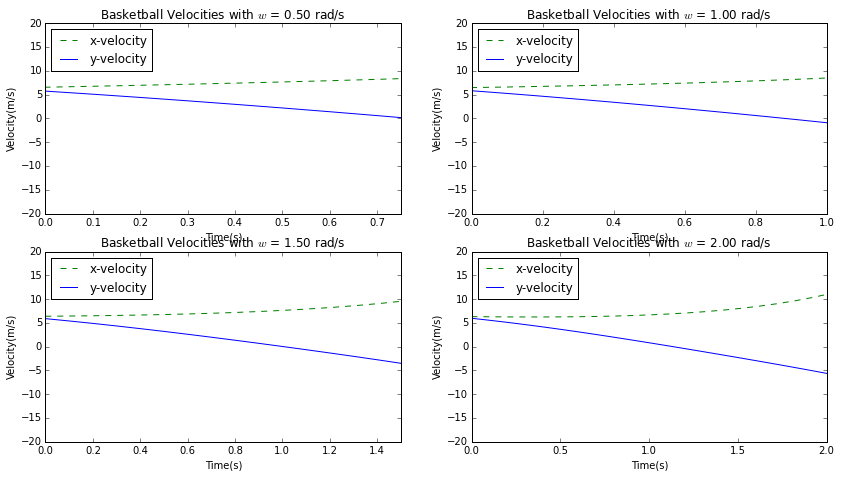

In [353]:
def velocity_bball_backspin(omega_1):
    '''Returns the vertical acceleration based on values input.
    
    omega_1 = rotational velocity of the basketball
    '''
    C1 = 0.54
    S0_m1 = 0.25
    M1 = 0.62
    theta1 = math.pi/4
    a1 = 0.0
    b1 = 10
    N1 = 100
    h1 = (b1-a1)/N1
    density1 = 1.225
    v01 = 9
    A1 = 0.045
    
    vx1 = v01*math.cos(theta1)
    vy1 = v01*math.sin(theta1)

    tpoints1 = np.linspace(a1,b1,N1)
    t1 = [0]

    vxpoints1 = [vx1]
    vypoints1 = [vy1]

    for i in tpoints1:
        if i > 3:
            break
        t1.append(i)
        v_tot1 = np.sqrt(vx1**2+vy1**2)
        theta_new1 = np.arcsin(vy1/v_tot1)
    
    
        f_temp1 = f_drag(C1,density1,A1,v_tot1)

        fx1 = f_temp1*math.cos(theta_new1)
        fy1 = f_temp1*math.sin(theta_new1)
    
        vx1 += h1*acc_x(fx1,M1,S0_m1,vy1,omega_1)
        vy1 += h1*acc_y(fy1,M1,S0_m1,vx1,omega_1)
    
        vxpoints1.append(vx1)
        vypoints1.append(vy1)
    return vxpoints1,vypoints1,t1


w1 = [0.5,1,1.5,2]

v_x1,v_y1,t_1 = velocity_bball_backspin(w1[0])
v_x2,v_y2,t_2 = velocity_bball_backspin(w1[1])
v_x3,v_y3,t_3 = velocity_bball_backspin(w1[2])
v_x4,v_y4,t_4 = velocity_bball_backspin(w1[3])

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(14, 7.5)) #(ax1, ax2, ax3, ax4)
ax1.plot(t_1,v_x1,"g--",label = "x-velocity")
ax1.plot(t_1,v_y1,label = "y-velocity")
ax1.set_ylabel("Velocity(m/s)")
ax1.set_xlabel("Time(s)")
ax1.set_ylim(-20,20)
ax1.set_xlim(0,0.75)
ax1.legend(loc = 'best')

ax2.plot(t_2,v_x2,"g--",label = "x-velocity")
ax2.plot(t_2,v_y2,label = "y-velocity")
ax2.set_ylabel("Velocity(m/s)")
ax2.set_xlabel("Time(s)")
ax2.set_ylim(-20,20)
ax2.set_xlim(0,1)
ax2.legend(loc = 'best')

ax3.plot(t_3,v_x3,"g--",label = "x-velocity")
ax3.plot(t_3,v_y3,label = "y-velocity")
ax3.set_ylabel("Velocity(m/s)")
ax3.set_xlabel("Time(s)")
ax3.set_ylim(-20,20)
ax3.set_xlim(0,1.5)
ax3.legend(loc = 'best')

ax4.plot(t_4,v_x4,"g--",label = "x-velocity")
ax4.plot(t_4,v_y4,label = "y-velocity")
ax4.set_ylabel("Velocity(m/s)")
ax4.set_xlabel("Time(s)")
ax4.set_ylim(-20,20)
ax4.set_xlim(0,2)
ax4.legend(loc = 'best')

ax1.set_title("Basketball Velocities with $w$ = 0.50 rad/s")
ax2.set_title("Basketball Velocities with $w$ = 1.00 rad/s")
ax3.set_title("Basketball Velocities with $w$ = 1.50 rad/s")
ax4.set_title("Basketball Velocities with $w$ = 2.00 rad/s")

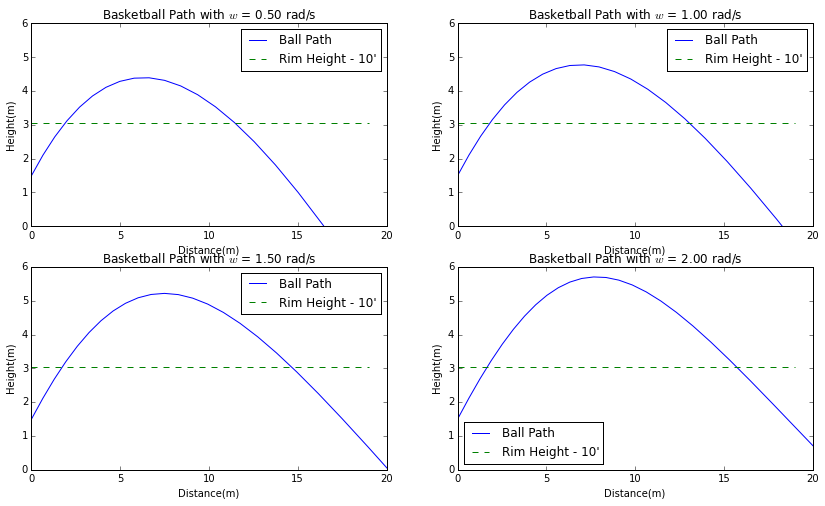

In [354]:
def path_bball_backspin(v_x,v_y):   
    Dx1 = [0]
    Dy1 = [0]
    N2 = len(v_x)
    a1 = 0.0
    b1 = 10
    N1 = 100
    h1 = (b1-a1)/N1
    
    sx2 = 0
    sy2 = 1.5

    Dx1.append(sx2)
    Dy1.append(sy2)

    for k in range(N2-1):
        sx2 += (v_x[k] + v_x[k+1])*h1/2
        sy2 += (v_y[k] + v_y[k+1])*h1/2
        Dx1.append(sx2)
        Dy1.append(sy2)
    return Dx1,Dy1

D_x1,D_y1 = path_bball_backspin(v_x1,v_y1)
D_x2,D_y2 = path_bball_backspin(v_x2,v_y2)
D_x3,D_y3 = path_bball_backspin(v_x3,v_y3)
D_x4,D_y4 = path_bball_backspin(v_x4,v_y4)

hoop = np.ones(20)*3.048

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(14, 8)) #(ax1, ax2, ax3, ax4)
ax1.plot(D_x1,D_y1,label = "Ball Path")
ax1.plot(hoop,"g--",label = "Rim Height - 10'")
ax1.set_xlabel("Distance(m)")
ax1.set_ylabel("Height(m)")
ax1.set_ylim(0,6)
ax1.set_xlim(0,20)
ax1.legend(loc = 'best')

ax2.plot(D_x2,D_y2,label = "Ball Path")
ax2.plot(hoop,"g--",label = "Rim Height - 10'")
ax2.set_xlabel("Distance(m)")
ax2.set_ylabel("Height(m)")
ax2.set_ylim(0,6)
ax2.set_xlim(0,20)
ax2.legend(loc = 'best')

ax3.plot(D_x3,D_y3,label = "Ball Path")
ax3.plot(hoop,"g--",label = "Rim Height - 10'")
ax3.set_xlabel("Distance(m)")
ax3.set_ylabel("Height(m)")
ax3.set_ylim(0,6)
ax3.set_xlim(0,20)
ax3.legend(loc = 'best')

ax4.plot(D_x4,D_y4,label = "Ball Path")
ax4.plot(hoop,"g--",label = "Rim Height - 10'")
ax4.set_xlabel("Distance(m)")
ax4.set_ylabel("Height(m)")
ax4.set_ylim(0,6)
ax4.set_xlim(0,20)
ax4.legend(loc = 'best')

ax1.set_title("Basketball Path with $w$ = 0.50 rad/s")
ax2.set_title("Basketball Path with $w$ = 1.00 rad/s")
ax3.set_title("Basketball Path with $w$ = 1.50 rad/s")
ax4.set_title("Basketball Path with $w$ = 2.00 rad/s")